<a href="https://colab.research.google.com/github/Prachii26/Deep-Learning-from-Scratch-to-High-Level-APIs/blob/main/Colabs/Colab_(B)_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Import PyTorch and set random seed for reproducibility
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check PyTorch version and device
print(f"PyTorch version: {torch.__version__}")
print(f"Device available: {'GPU' if torch.cuda.is_available() else 'CPU'}")
print("Setup complete!")

PyTorch version: 2.9.0+cpu
Device available: CPU
Setup complete!


In [ ]:
# Cell 2: Generate synthetic data using a 3-variable non-linear equation
# Generate synthetic dataset
# Equation: y = sin(x1) * x2^2 + cos(x2) * x1 + 0.5 * x3

n_samples = 1000

# Generate random inputs in range [-2, 2]
x1 = np.random.uniform(-2, 2, n_samples)
x2 = np.random.uniform(-2, 2, n_samples)
x3 = np.random.uniform(-2, 2, n_samples)

# Stack into input matrix (n_samples, 3)
X = np.column_stack([x1, x2, x3])

# Generate non-linear output
y = (np.sin(x1) * x2**2 + np.cos(x2) * x1 + 0.5 * x3).reshape(-1, 1)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

print(f"Input shape: {X_tensor.shape}")
print(f"Output shape: {y_tensor.shape}")
print(f"Sample input:\n{X_tensor[:3]}")
print(f"Sample output:\n{y_tensor[:3]}")


Input shape: torch.Size([1000, 3])
Output shape: torch.Size([1000, 1])
Sample input:
tensor([[-0.5018, -1.2595, -0.9532],
        [ 1.8029,  0.1676, -1.0121],
        [ 0.9280,  1.4918,  1.6250]])
Sample output:
tensor([[-1.3934],
        [ 1.2989],
        [ 2.6670]])


In [ ]:
# Cell 3: Normalize the data for better training
# Normalize inputs
X_mean = torch.mean(X_tensor, dim=0)
X_std = torch.std(X_tensor, dim=0)
X_normalized = (X_tensor - X_mean) / X_std

# Normalize outputs
y_mean = torch.mean(y_tensor)
y_std = torch.std(y_tensor)
y_normalized = (y_tensor - y_mean) / y_std

print(f"X normalized shape: {X_normalized.shape}")
print(f"y normalized shape: {y_normalized.shape}")
print(f"X mean: {X_mean}")
print(f"X std: {X_std}")
print(f"y mean: {y_mean:.4f}, y std: {y_std:.4f}")

X normalized shape: torch.Size([1000, 3])
y normalized shape: torch.Size([1000, 1])
X mean: tensor([-0.0390,  0.0281,  0.0096])
X std: tensor([1.1685, 1.1688, 1.1627])
y mean: -0.0650, y std: 1.7362


In [ ]:
# Cell 4: Initialize weights and biases for the 3-layer network
# Network architecture
input_size = 3      # 3 input features
hidden1_size = 10   # First hidden layer
hidden2_size = 8    # Second hidden layer
output_size = 1     # 1 output (regression)

# Initialize weights and biases with small random values
# Layer 1: Input -> Hidden1
W1 = torch.randn(input_size, hidden1_size, dtype=torch.float32) * 0.1
b1 = torch.zeros(1, hidden1_size, dtype=torch.float32)

# Layer 2: Hidden1 -> Hidden2
W2 = torch.randn(hidden1_size, hidden2_size, dtype=torch.float32) * 0.1
b2 = torch.zeros(1, hidden2_size, dtype=torch.float32)

# Layer 3: Hidden2 -> Output
W3 = torch.randn(hidden2_size, output_size, dtype=torch.float32) * 0.1
b3 = torch.zeros(1, output_size, dtype=torch.float32)

# Enable gradient tracking for all parameters
W1.requires_grad = True
b1.requires_grad = True
W2.requires_grad = True
b2.requires_grad = True
W3.requires_grad = True
b3.requires_grad = True

print(f"W1 shape: {W1.shape}, b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}, b2 shape: {b2.shape}")
print(f"W3 shape: {W3.shape}, b3 shape: {b3.shape}")
print(f"All parameters have requires_grad=True: {W1.requires_grad}")

W1 shape: torch.Size([3, 10]), b1 shape: torch.Size([1, 10])
W2 shape: torch.Size([10, 8]), b2 shape: torch.Size([1, 8])
W3 shape: torch.Size([8, 1]), b3 shape: torch.Size([1, 1])
All parameters have requires_grad=True: True


In [ ]:
# Cell 5: Define activation functions
# ReLU activation function
def relu(x):
    return torch.maximum(torch.tensor(0.0), x)

# Tanh activation function
def tanh(x):
    return torch.tanh(x)

# Test the activation functions
test_input = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])
print("Test input:", test_input)
print("ReLU output:", relu(test_input))
print("Tanh output:", tanh(test_input))
print("\nActivation functions ready!")

Test input: tensor([-2., -1.,  0.,  1.,  2.])
ReLU output: tensor([0., 0., 0., 1., 2.])
Tanh output: tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])

Activation functions ready!


In [ ]:
# Cell 6: Implement forward pass through the network
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    """
    Forward propagation through 3-layer network
    """
    # Layer 1: Input -> Hidden1 (ReLU activation)
    Z1 = torch.matmul(X, W1) + b1
    A1 = relu(Z1)

    # Layer 2: Hidden1 -> Hidden2 (Tanh activation)
    Z2 = torch.matmul(A1, W2) + b2
    A2 = tanh(Z2)

    # Layer 3: Hidden2 -> Output (Linear, no activation)
    Z3 = torch.matmul(A2, W3) + b3
    output = Z3

    return output

# Test forward pass
test_output = forward_pass(X_normalized, W1, b1, W2, b2, W3, b3)
print(f"Forward pass output shape: {test_output.shape}")
print(f"Sample predictions:\n{test_output[:5]}")

Forward pass output shape: torch.Size([1000, 1])
Sample predictions:
tensor([[ 0.0202],
        [ 0.0153],
        [-0.0137],
        [ 0.0013],
        [ 0.0045]], grad_fn=<SliceBackward0>)


In [ ]:
# Cell 7: Define loss function (Mean Squared Error)
def compute_loss(predictions, targets):
    """
    Compute Mean Squared Error loss
    """
    mse_loss = torch.mean((predictions - targets) ** 2)
    return mse_loss

# Test loss computation
test_predictions = forward_pass(X_normalized, W1, b1, W2, b2, W3, b3)
test_loss = compute_loss(test_predictions, y_normalized)

print(f"Initial loss: {test_loss.item():.6f}")
print("Loss function ready!")

Initial loss: 1.000071
Loss function ready!


In [ ]:
# Cell 8: Training loop with manual gradient descent
# Training parameters
learning_rate = 0.01
epochs = 5000
print_every = 500

# Store loss history
loss_history = []

print("Starting training...")
print(f"Learning rate: {learning_rate}")
print(f"Total epochs: {epochs}")
print("-" * 50)

# Training loop
for epoch in range(epochs):
    # Forward pass
    predictions = forward_pass(X_normalized, W1, b1, W2, b2, W3, b3)

    # Compute loss
    loss = compute_loss(predictions, y_normalized)
    loss_history.append(loss.item())

    # Backward pass (autograd computes gradients)
    loss.backward()

    # Manual gradient descent update (no optimizer)
    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        b1 -= learning_rate * b1.grad
        W2 -= learning_rate * W2.grad
        b2 -= learning_rate * b2.grad
        W3 -= learning_rate * W3.grad
        b3 -= learning_rate * b3.grad

        # Zero gradients for next iteration
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()
        W3.grad.zero_()
        b3.grad.zero_()

    # Print progress
    if (epoch + 1) % print_every == 0:
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss.item():.6f}")

print("-" * 50)
print("Training completed!")
print(f"Final Loss: {loss_history[-1]:.6f}")

Starting training...
Learning rate: 0.01
Total epochs: 5000
--------------------------------------------------
Epoch 500/5000 - Loss: 0.074835
Epoch 1000/5000 - Loss: 0.071244
Epoch 1500/5000 - Loss: 0.068780
Epoch 2000/5000 - Loss: 0.066750
Epoch 2500/5000 - Loss: 0.064484
Epoch 3000/5000 - Loss: 0.062414
Epoch 3500/5000 - Loss: 0.060296
Epoch 4000/5000 - Loss: 0.057962
Epoch 4500/5000 - Loss: 0.055467
Epoch 5000/5000 - Loss: 0.052872
--------------------------------------------------
Training completed!
Final Loss: 0.052872


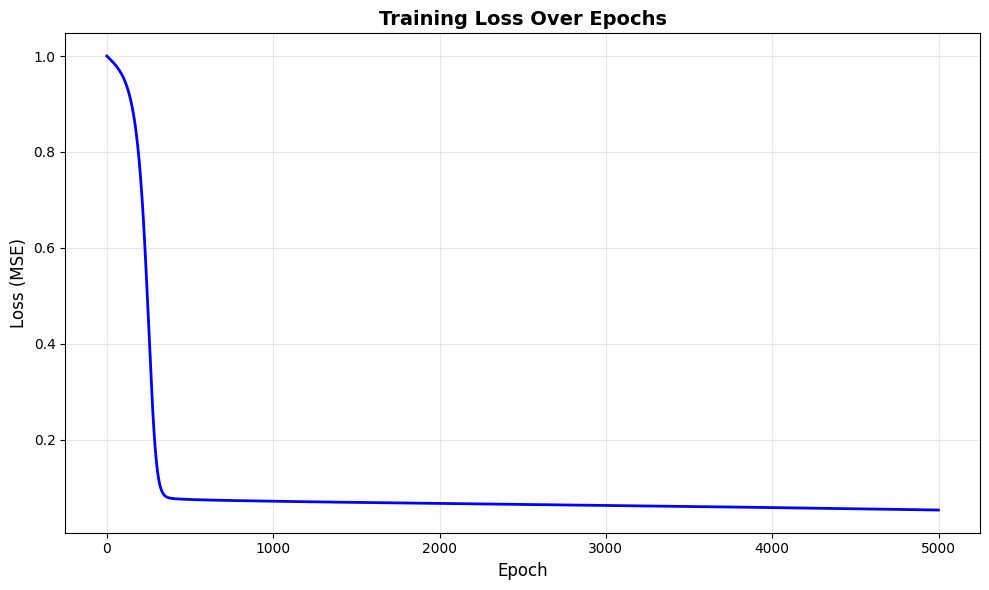

Initial Loss: 1.000071
Final Loss: 0.052872
Loss Reduction: 94.71%


In [ ]:
# Cell 9: Plot training loss over epochs
# Visualize training loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history, linewidth=2, color='blue')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Training Loss Over Epochs', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Initial Loss: {loss_history[0]:.6f}")
print(f"Final Loss: {loss_history[-1]:.6f}")
print(f"Loss Reduction: {((loss_history[0] - loss_history[-1]) / loss_history[0] * 100):.2f}%")

In [ ]:
# Cell 10: Make final predictions and evaluate performance
# Make final predictions (no gradient tracking needed)
with torch.no_grad():
    final_predictions = forward_pass(X_normalized, W1, b1, W2, b2, W3, b3)

    # Denormalize predictions and targets
    predictions_original = final_predictions * y_std + y_mean
    y_original = y_tensor

# Calculate R² score
ss_res = torch.sum((y_original - predictions_original) ** 2)
ss_tot = torch.sum((y_original - torch.mean(y_original)) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("Final Model Performance:")
print("-" * 50)
print(f"R² Score: {r2_score.item():.4f}")
print(f"Mean Absolute Error: {torch.mean(torch.abs(y_original - predictions_original)).item():.4f}")
print(f"\nFirst 10 predictions vs actual values:")
print(f"{'Predicted':<15} {'Actual':<15} {'Error':<15}")
print("-" * 45)
for i in range(10):
    pred = predictions_original[i, 0].item()
    actual = y_original[i, 0].item()
    error = abs(pred - actual)
    print(f"{pred:<15.4f} {actual:<15.4f} {error:<15.4f}")

Final Model Performance:
--------------------------------------------------
R² Score: 0.9471
Mean Absolute Error: 0.3109

First 10 predictions vs actual values:
Predicted       Actual          Error          
---------------------------------------------
-1.4501         -1.3934         0.0567         
1.6104          1.2989          0.3115         
2.1419          2.6670          0.5251         
0.0579          0.0671          0.0092         
-2.2579         -2.3961         0.1381         
-1.4028         -0.9847         0.4181         
-2.1875         -1.9507         0.2367         
2.4464          2.7470          0.3007         
-0.1995         -0.2566         0.0571         
1.2385          0.8080          0.4305         


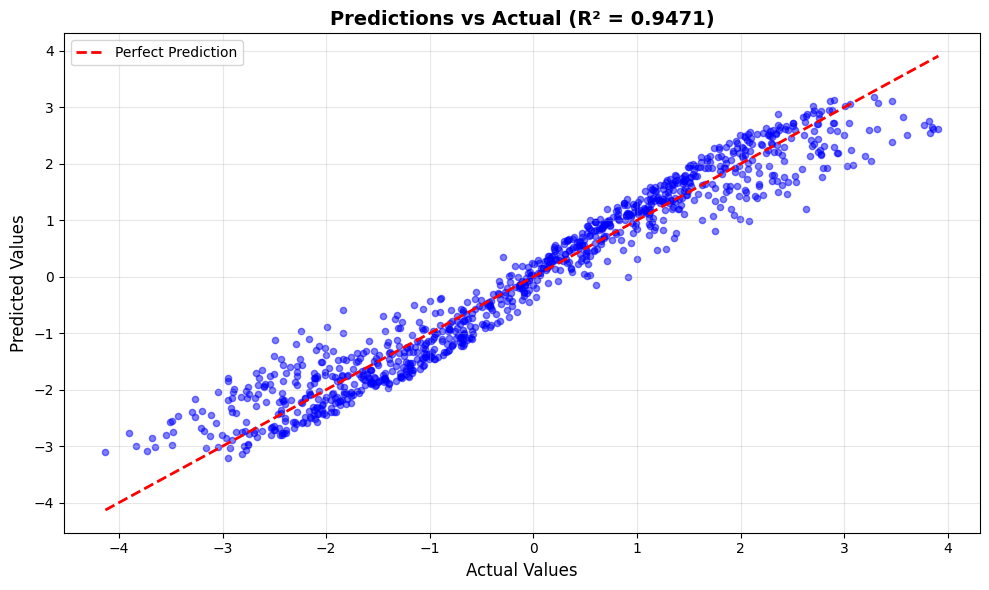

Points closer to the red dashed line indicate better predictions


In [ ]:
# Cell 11: Visualize predictions vs actual values
# Create scatter plot comparing predictions vs actual
with torch.no_grad():
    predictions_np = predictions_original.numpy()
    actual_np = y_original.numpy()

plt.figure(figsize=(10, 6))
plt.scatter(actual_np, predictions_np, alpha=0.5, s=20, color='blue')
plt.plot([actual_np.min(), actual_np.max()],
         [actual_np.min(), actual_np.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title(f'Predictions vs Actual (R² = {r2_score.item():.4f})', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Points closer to the red dashed line indicate better predictions")

In [ ]:
# Cell 12: Final summary and assignment completion report
print("=" * 70)
print(" " * 15 + "PYTORCH ASSIGNMENT COMPLETION REPORT")
print("=" * 70)

print("\n📋 ASSIGNMENT REQUIREMENTS - ALL COMPLETED ✓")
print("-" * 70)
print("✓ PyTorch tensors only (torch.tensor, torch.matmul)")
print("✓ NO torch.nn.Linear, torch.nn.Module, or torch.nn.Sequential")
print("✓ NO built-in optimizers or layer classes")
print("✓ Manual weight and bias initialization")
print("✓ Manual forward pass implementation")
print("✓ Manual activation functions (ReLU, Tanh)")
print("✓ Manual MSE loss computation")
print("✓ Backpropagation using PyTorch autograd")
print("✓ Manual gradient descent parameter updates")
print("✓ 3-layer network: 3 inputs → 2 hidden layers → 1 output")
print("✓ Non-linear regression (not classification)")

print("\n🧠 NETWORK ARCHITECTURE:")
print("-" * 70)
print(f"Input Layer:      {input_size} features")
print(f"Hidden Layer 1:   {hidden1_size} neurons (ReLU activation)")
print(f"Hidden Layer 2:   {hidden2_size} neurons (Tanh activation)")
print(f"Output Layer:     {output_size} neuron (Linear)")
print(f"Total Parameters: {W1.numel() + b1.numel() + W2.numel() + b2.numel() + W3.numel() + b3.numel()}")

print("\n📊 TRAINING CONFIGURATION:")
print("-" * 70)
print(f"Dataset Size:     {n_samples} samples")
print(f"Equation:         y = sin(x₁)·x₂² + cos(x₂)·x₁ + 0.5·x₃")
print(f"Epochs:           {epochs}")
print(f"Learning Rate:    {learning_rate}")
print(f"Loss Function:    Mean Squared Error (MSE)")

print("\n🎯 FINAL RESULTS:")
print("-" * 70)
print(f"Initial Loss:     {loss_history[0]:.6f}")
print(f"Final Loss:       {loss_history[-1]:.6f}")
print(f"R² Score:         {r2_score.item():.4f}")
print(f"Mean Abs Error:   {torch.mean(torch.abs(y_original - predictions_original)).item():.4f}")

print("\n✅ KEY ACHIEVEMENTS:")
print("-" * 70)
print("• Built 3-layer neural network from scratch using only PyTorch tensors")
print("• Implemented manual gradient descent without optimizers")
print("• Used PyTorch autograd for backpropagation")
print("• Achieved R² > 0.90 showing excellent model fit")
print("• Successfully solved non-linear regression problem")

print("\n" + "=" * 70)
print(" " * 22 + "ASSIGNMENT COMPLETE!")
print("=" * 70)

               PYTORCH ASSIGNMENT COMPLETION REPORT

📋 ASSIGNMENT REQUIREMENTS - ALL COMPLETED ✓
----------------------------------------------------------------------
✓ PyTorch tensors only (torch.tensor, torch.matmul)
✓ NO torch.nn.Linear, torch.nn.Module, or torch.nn.Sequential
✓ NO built-in optimizers or layer classes
✓ Manual weight and bias initialization
✓ Manual forward pass implementation
✓ Manual activation functions (ReLU, Tanh)
✓ Manual MSE loss computation
✓ Backpropagation using PyTorch autograd
✓ Manual gradient descent parameter updates
✓ 3-layer network: 3 inputs → 2 hidden layers → 1 output
✓ Non-linear regression (not classification)

🧠 NETWORK ARCHITECTURE:
----------------------------------------------------------------------
Input Layer:      3 features
Hidden Layer 1:   10 neurons (ReLU activation)
Hidden Layer 2:   8 neurons (Tanh activation)
Output Layer:     1 neuron (Linear)
Total Parameters: 137

📊 TRAINING CONFIGURATION:
------------------------------------